<a href="https://colab.research.google.com/github/nathanschoeck/Computer-Vision/blob/main/Image_Transformations_Scaling_and_Aspect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is Python code for image scaling while preserving or adjusting the aspect ratio. It demonstrates scaling an image to specific dimensions and provides options to either maintain or modify the aspect ratio.

1. Import Libraries

In [3]:
import cv2
import matplotlib.pyplot as plt

2. Scale Image Function

In [4]:
def scale_image(image, width=None, height=None, keep_aspect_ratio=True):
    """
    Scales an image to a specified width, height, or both.
    Args:
        image: Input image (NumPy array).
        width: Desired width of the output image (optional).
        height: Desired height of the output image (optional).
        keep_aspect_ratio: If True, maintains the original aspect ratio.
    Returns:
        Scaled image.
    """
    original_height, original_width = image.shape[:2]

    if keep_aspect_ratio:
        # Compute scaling factor while maintaining aspect ratio
        if width and height:
            raise ValueError("Specify either width or height, not both, to maintain aspect ratio.")
        if width:
            scale_factor = width / original_width
            new_width = width
            new_height = int(original_height * scale_factor)
        elif height:
            scale_factor = height / original_height
            new_height = height
            new_width = int(original_width * scale_factor)
        else:
            raise ValueError("Specify either width or height to scale the image.")
    else:
        # Scale without keeping aspect ratio
        if not width or not height:
            raise ValueError("Both width and height must be specified when not maintaining aspect ratio.")
        new_width = width
        new_height = height

    # Resize the image
    scaled_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

    return scaled_image

3. Load the input image

In [5]:
image_path = "/Girl_with_a_Pearl_Earring.jpg"  # Replace with your image path
image = cv2.imread(image_path)

4. Scale the image while maintaining aspect ratio

In [6]:
scaled_width = 300  # Desired width
scaled_aspect_image = scale_image(image, width=scaled_width, keep_aspect_ratio=True)

5. Scale the image without keeping aspect ratio

In [7]:
scaled_fixed_dimensions_image = scale_image(image, width=300, height=150, keep_aspect_ratio=False)

6. Display the results

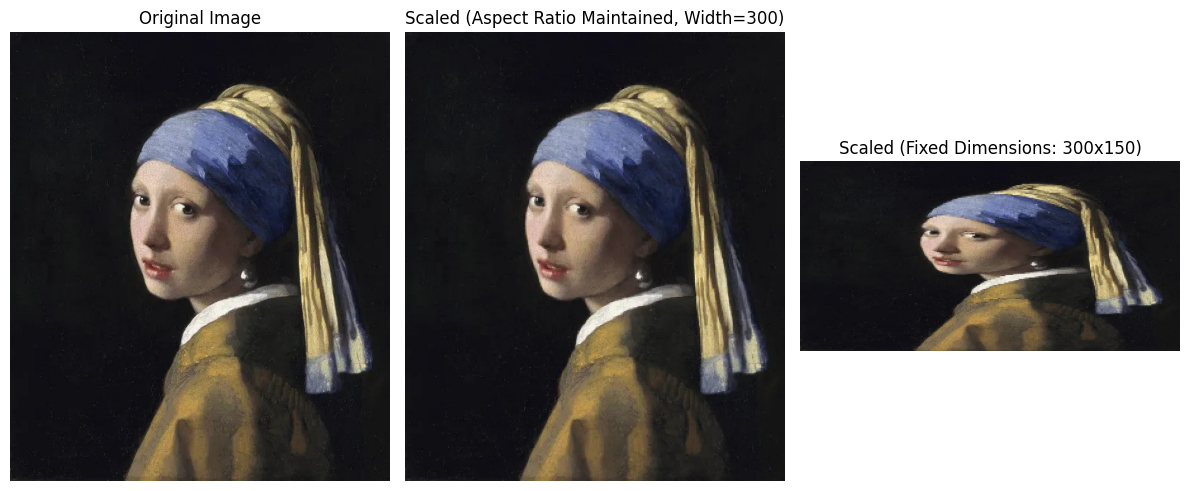

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(scaled_aspect_image, cv2.COLOR_BGR2RGB))
plt.title(f"Scaled (Aspect Ratio Maintained, Width={scaled_width})")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(scaled_fixed_dimensions_image, cv2.COLOR_BGR2RGB))
plt.title("Scaled (Fixed Dimensions: 300x150)")
plt.axis("off")

plt.tight_layout()
plt.show()

7. Save the results

In [9]:
cv2.imwrite("scaled_aspect_image.jpg", scaled_aspect_image)
cv2.imwrite("scaled_fixed_dimensions_image.jpg", scaled_fixed_dimensions_image)

True